# Problem Statement

Startup is a business that has just been established and grown supported by digital services and has also become an important element of innovation systems and economies around the world. The Startup ecosystem is growing very rapidly and still needs a lot of funding to operate with a minimalist working group. So it is very important for VC to monitor the performance and performance of Startup, so that it can be used as a consideration to decide whether to fund a Startup to drive its growth or refuse to take part in funding. To monitor startup performance, it is important to analyze what makes a Startup successful and how to determine its success.

# Goals

The goal to be achieved is to determine whether a StartUp will be successful or not.

#  Data Exploration

### Import Libraries

In [1]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd
import missingno as mnso
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')
from collections import Counter
import datetime
import wordcloud
import json

### Load Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Treue Intership file/startup data.csv")

In [5]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
df.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,1/1/2003,NaN,2/13/2006,2/13/2006,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,CA,1,0,0,0,0,security,0,0,0,0,0,0,0,0,0,1,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [7]:
df.shape

(923, 49)

### Description

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [9]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum().sum()

1386

<Axes: >

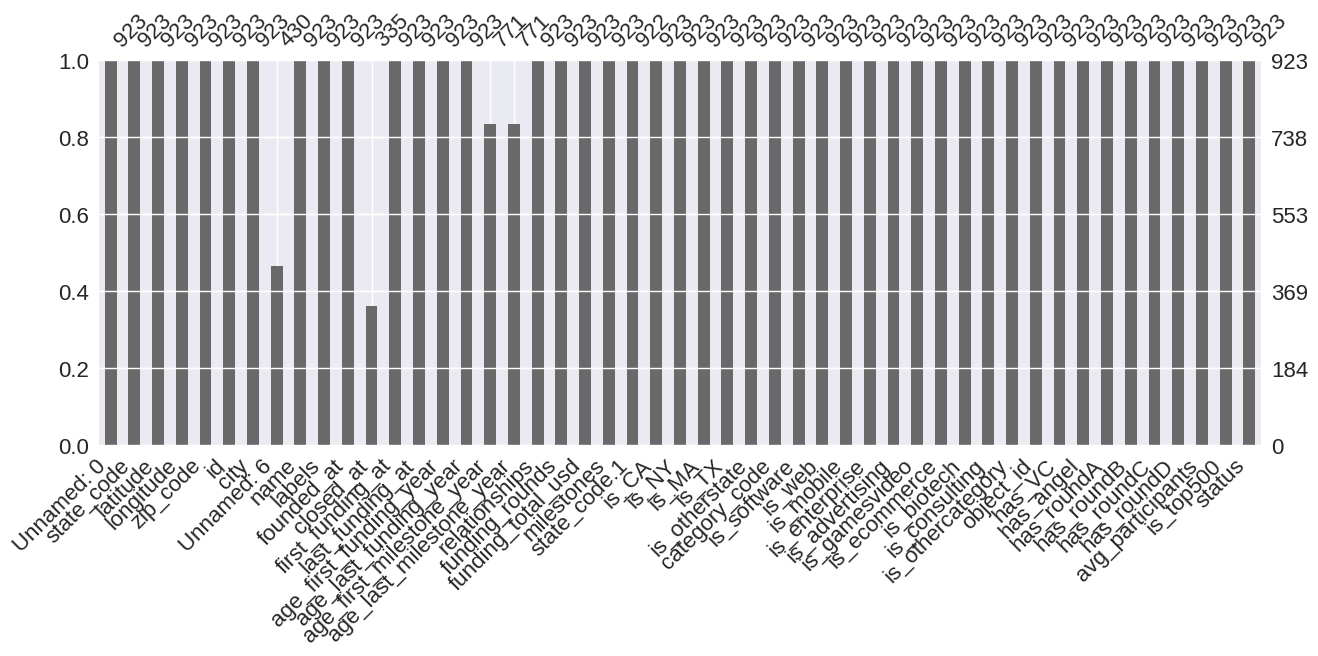

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
# create the missingno bar plot
mnso.bar(df, ax=ax)

### Data type identification

In [13]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### Data numeric

In [14]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1


### Data categorical

In [15]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired


### changing 'status' data value

In [16]:
df['status'] = df.status.map({'acquired':1, 'closed':0})

### Handling 'status' data type to int

In [17]:
#Tipe data status diganti dari object ke int
df['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

### Drop Column Labels

In [18]:
#labels dan status check similarity
for index, row in df.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [19]:
#drop feature
df.drop(["labels"], axis=1, inplace=True)

# Exploratory Data Analysis

## Numerical Approach

### Statistical Summary

In [20]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [21]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


### Categorical Value Counting

In [22]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status']
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

Value count kolom zip_code:
94107             30
94105             23
95054             20
94103             19
94043             18
94025             16
94041             16
94110             15
10011             14
10003             13
94301             13
98104             12
78701             12
94306             11
1803              11
94111             11
94404             11
94104             11
10013             11
10010             10
10001             10
2451              10
94085             10
94403              9
94040              9
94063              9
10016         

### Missing Value

In [23]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [24]:
# Checking Missing Values Column
df[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(4)

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1


### Handling Missing Value Unnamed: 6

In [25]:
df['Unnamed: 6'] = df.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [26]:
# Total Missing Values kolom "Unnamed: 6"
totalNull = df['Unnamed: 6'].isnull().sum()

print('Total Missing Values Kolom "Unnamed: 6": ', totalNull)

Total Missing Values Kolom "Unnamed: 6":  0


### Handling Missing Value closed_at

In [27]:
df['closed_at'] = df['closed_at'].fillna(value="31/12/2013")

In [28]:
totalNull = df['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


### Handling Missing Value age_first_milestone_year and age_last_milestone_year

In [29]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [30]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

### Handling Missing Value state_code.1

In [31]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

515 CA nan


In [32]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

# Graphic Approach

### Correlation heatmap

In [34]:
df.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,-0.000338,0.017708,-0.016420,-0.295894,-0.122905,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,-0.032863,-0.123909,-0.156038,0.175672,0.127427,0.083657,0.064852,0.071892,0.004819,-0.181104,0.006833,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260
is_CA,-0.042446,-0.417471,-0.780122,-0.010800,0.006190,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,-0.332216,-0.230759,-0.562953,-0.039258,0.024052,-0.020809,-0.028279,0.002489,0.042951,-0.056024,0.023742,-0.022224,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217


In [35]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

(32.5, -0.5)

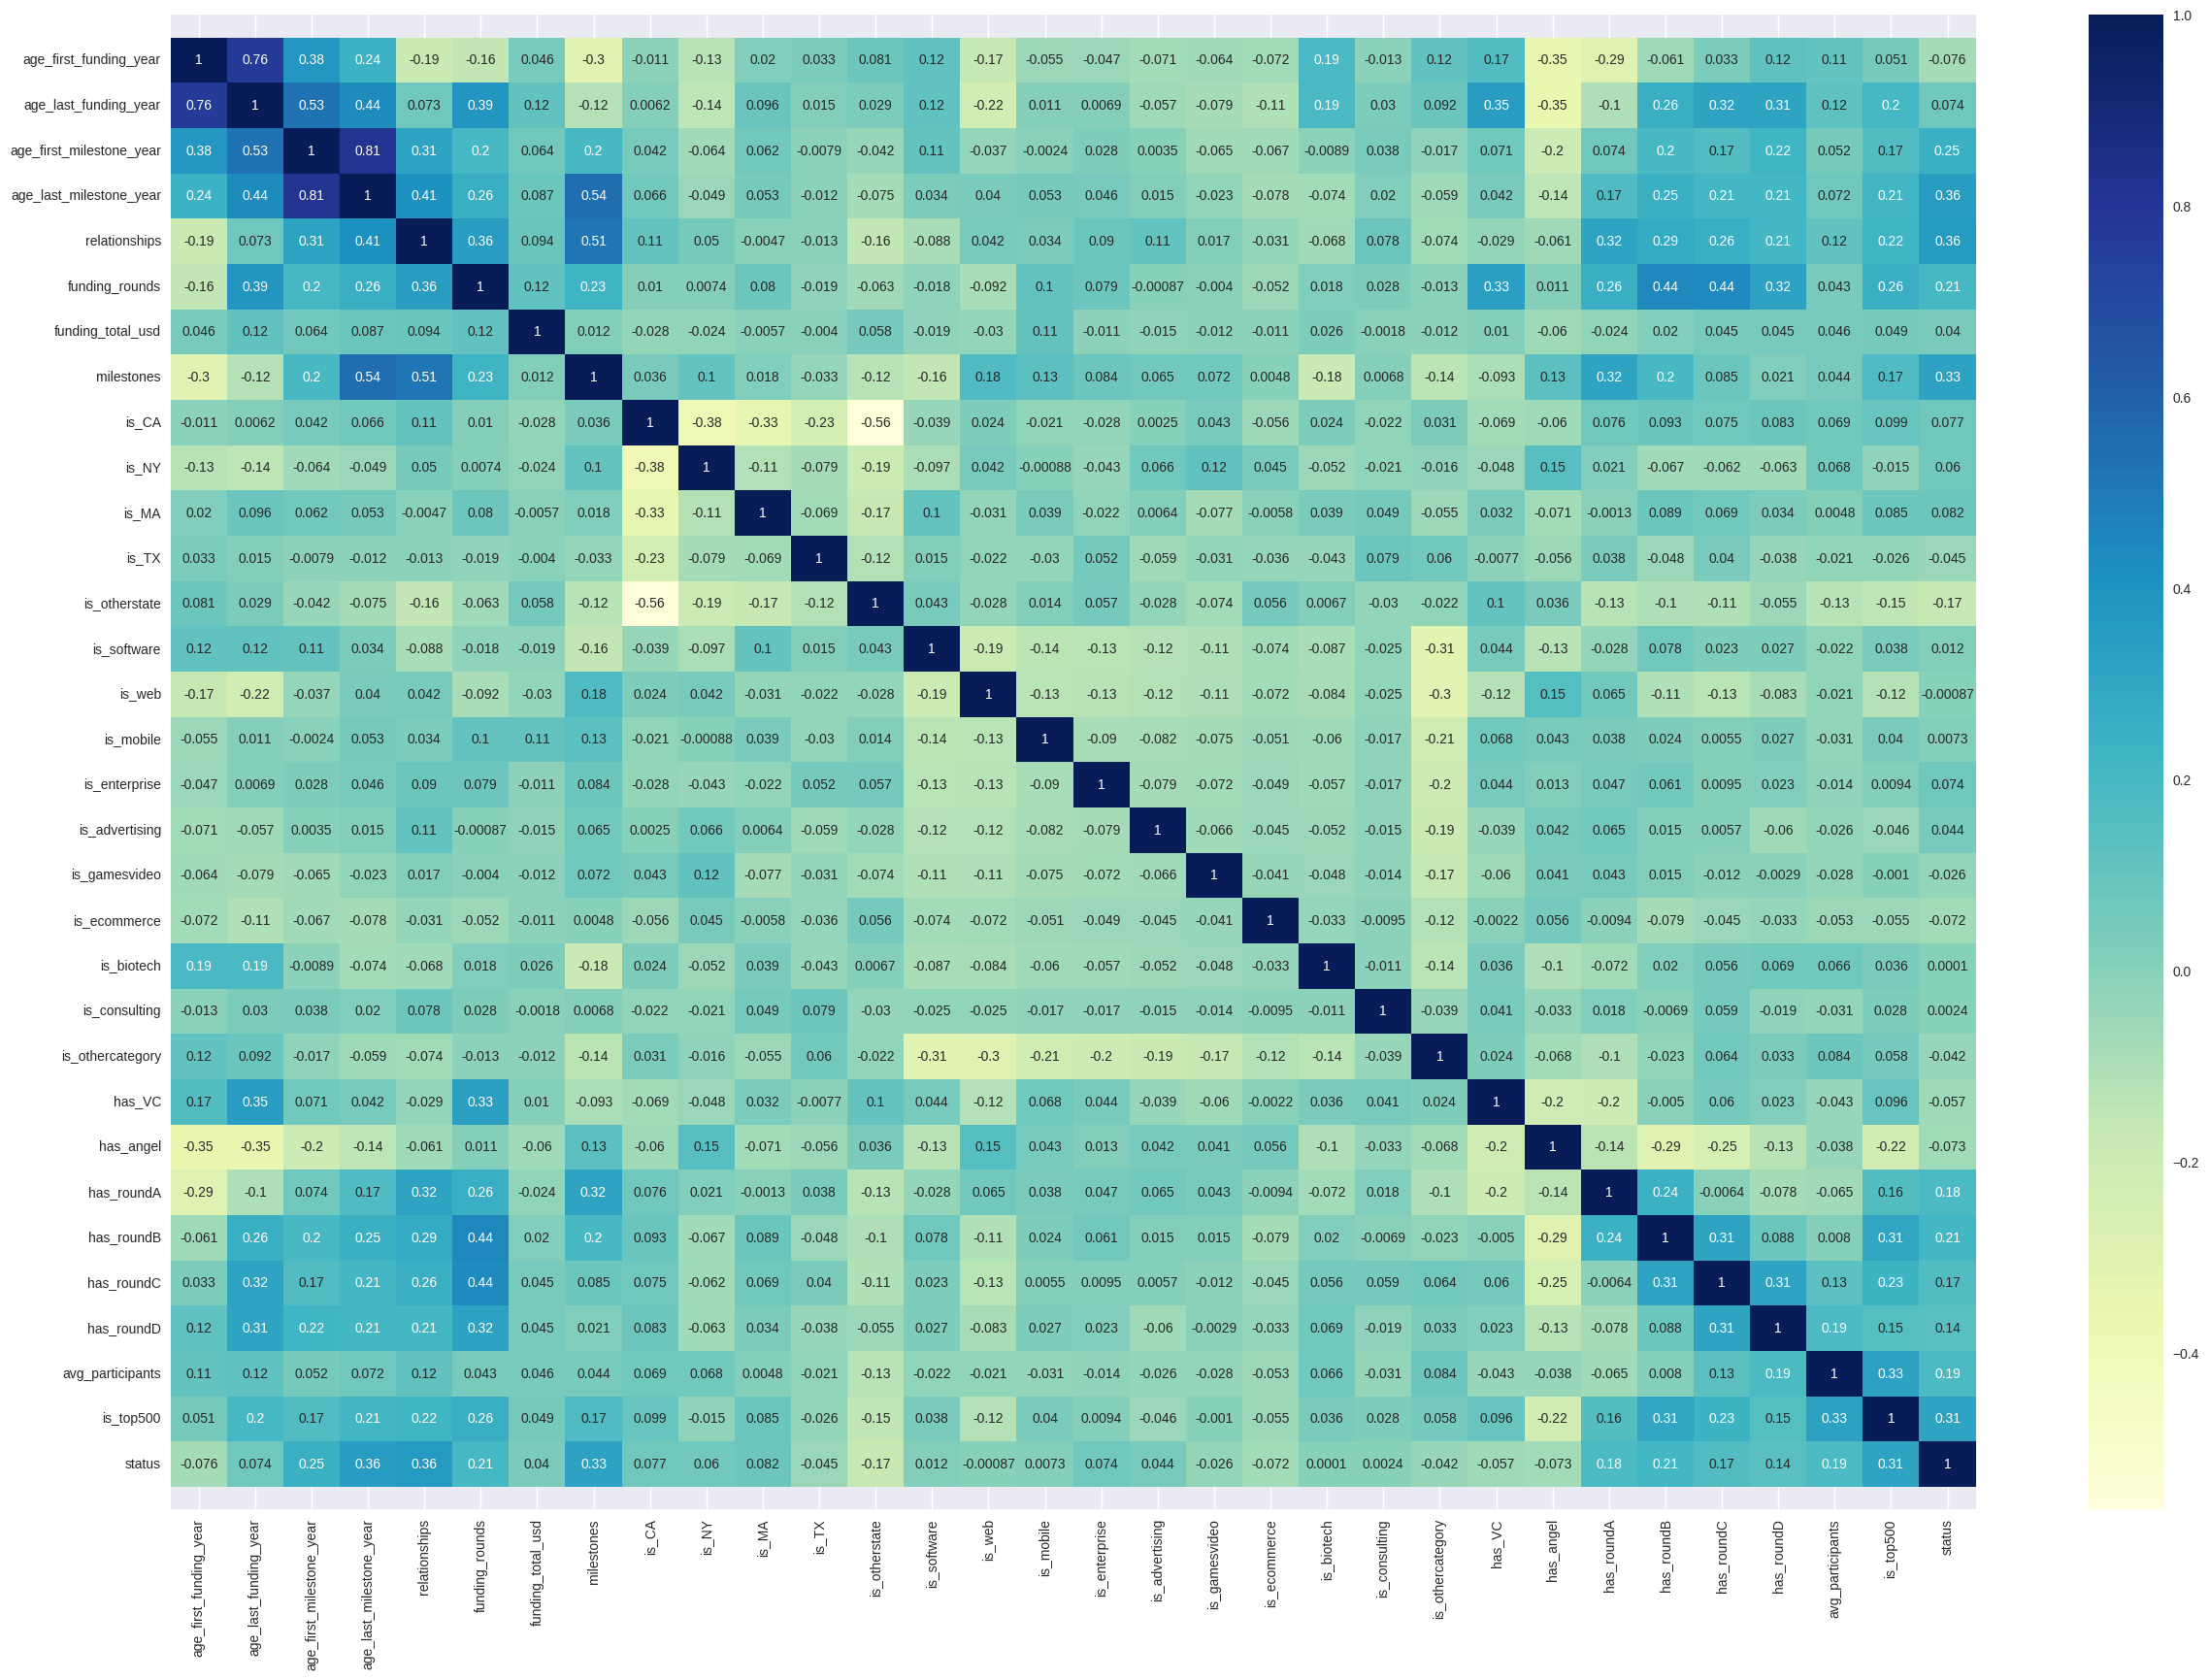

In [36]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

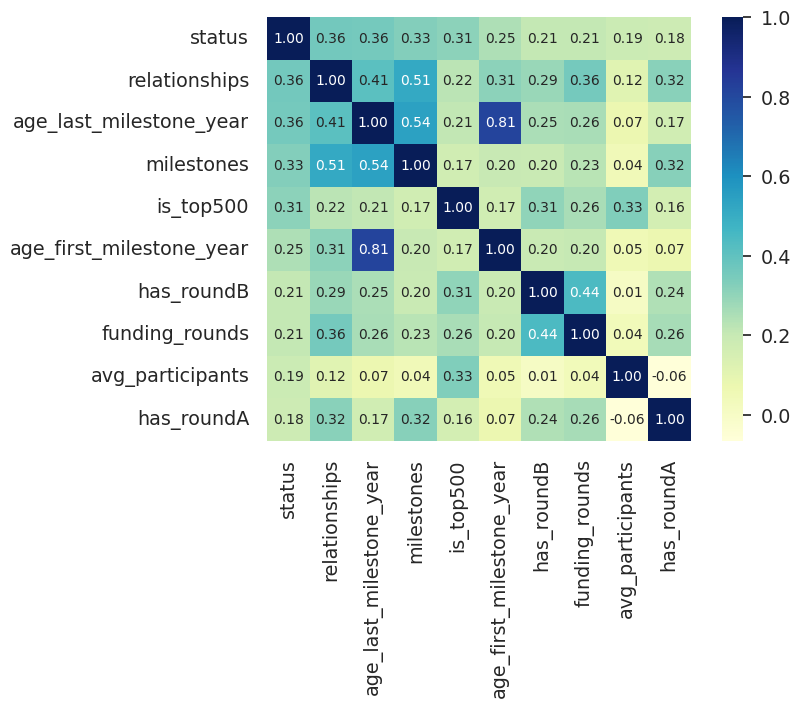

In [37]:
#number of variables for heatmap
cols = df[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Scatter plot

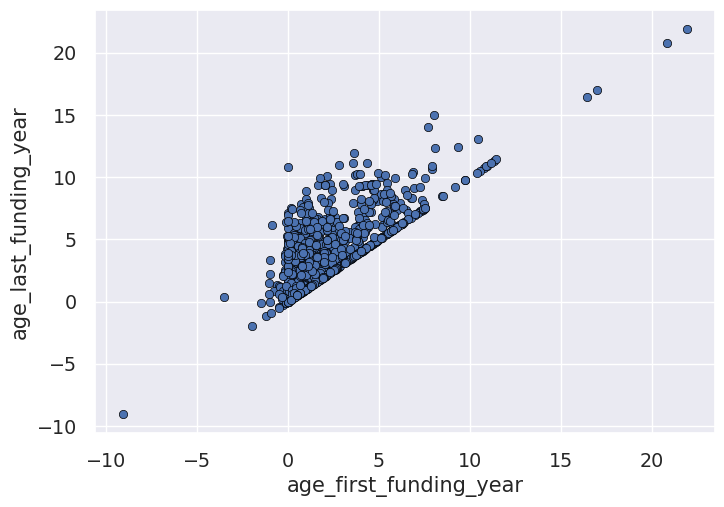

In [38]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_funding_year'], y=df['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

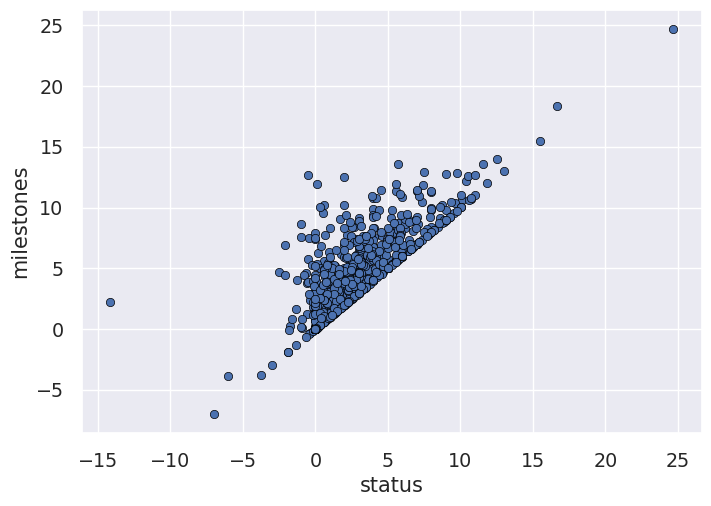

In [39]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['age_first_milestone_year'], y=df['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

### Box plots

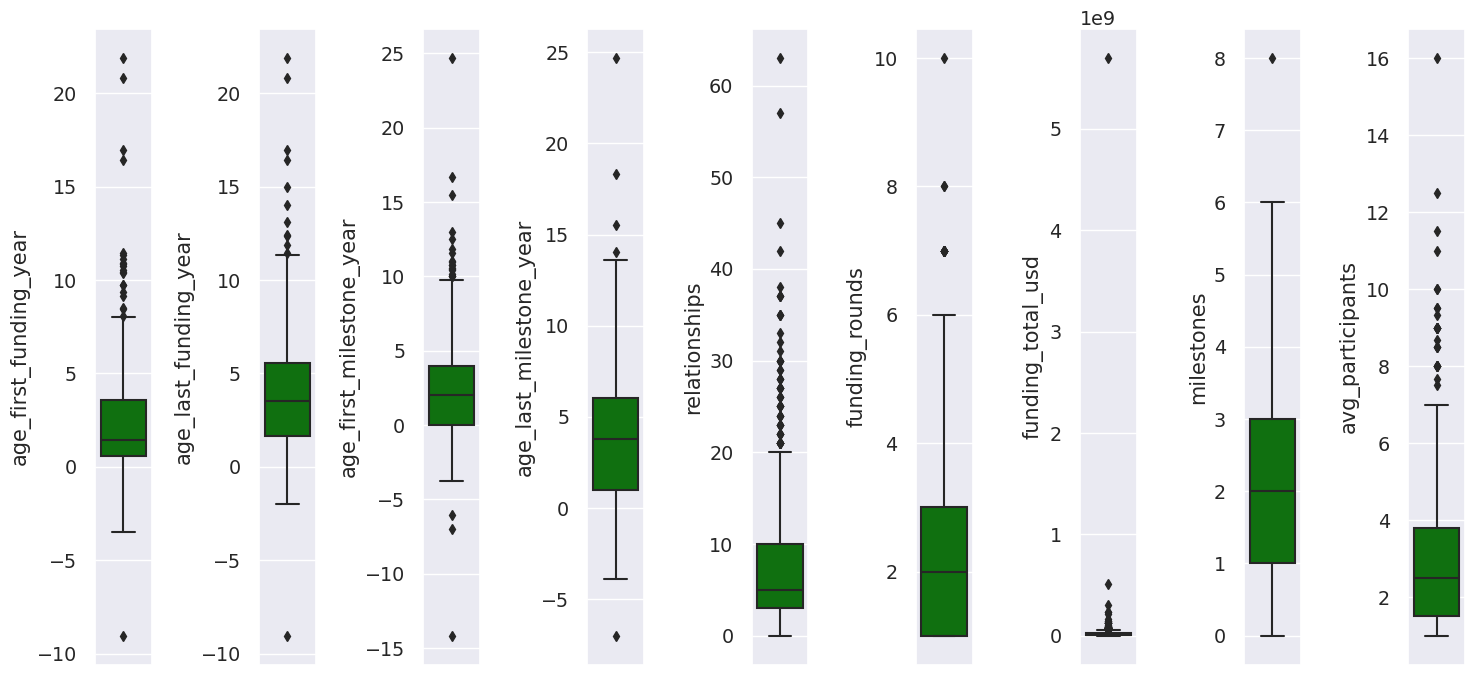

In [40]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()


### Dataset collection founded years

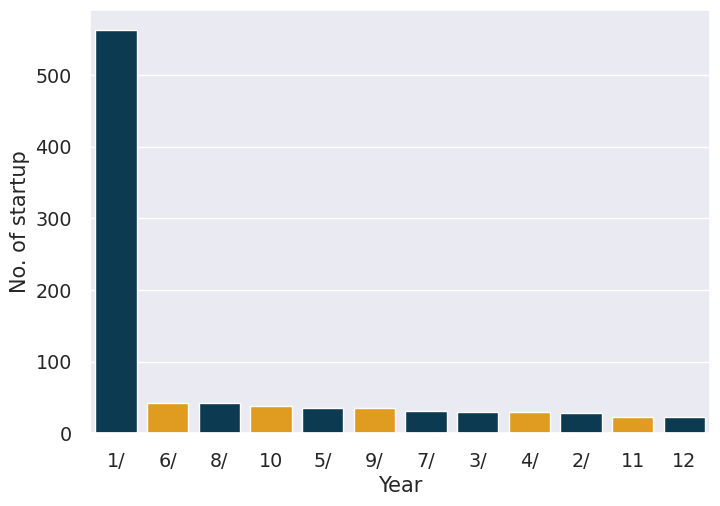

In [41]:
cdf = df["founded_at"].apply(lambda x: '' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "founded_at": "No_of_startup"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_startup", data=cdf,
                palette=sns.color_palette(['#003f5c', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of startup")


In [42]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: founded_at, dtype: int64

In [43]:
df["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: founded_at, dtype: float64

In [44]:
df["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:10    0.020585
20:3/    0.020585
20:11    0.020585
20:4/    0.019502
20:12    0.018418
20:9/    0.018418
Name: closed_at, dtype: float64

### How many Startup are acquired or closed have?

In [45]:
df_acquired = df[(df["status"] == True)]
df_acquired.shape

(597, 47)

In [46]:
df_closed = df[(df["status"] == False)]
df_closed.shape

(326, 47)

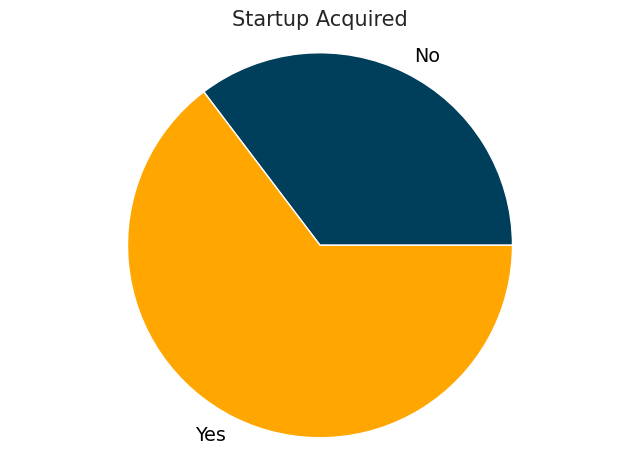

In [47]:
value_counts = df["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

### Which category has the largest number of startup

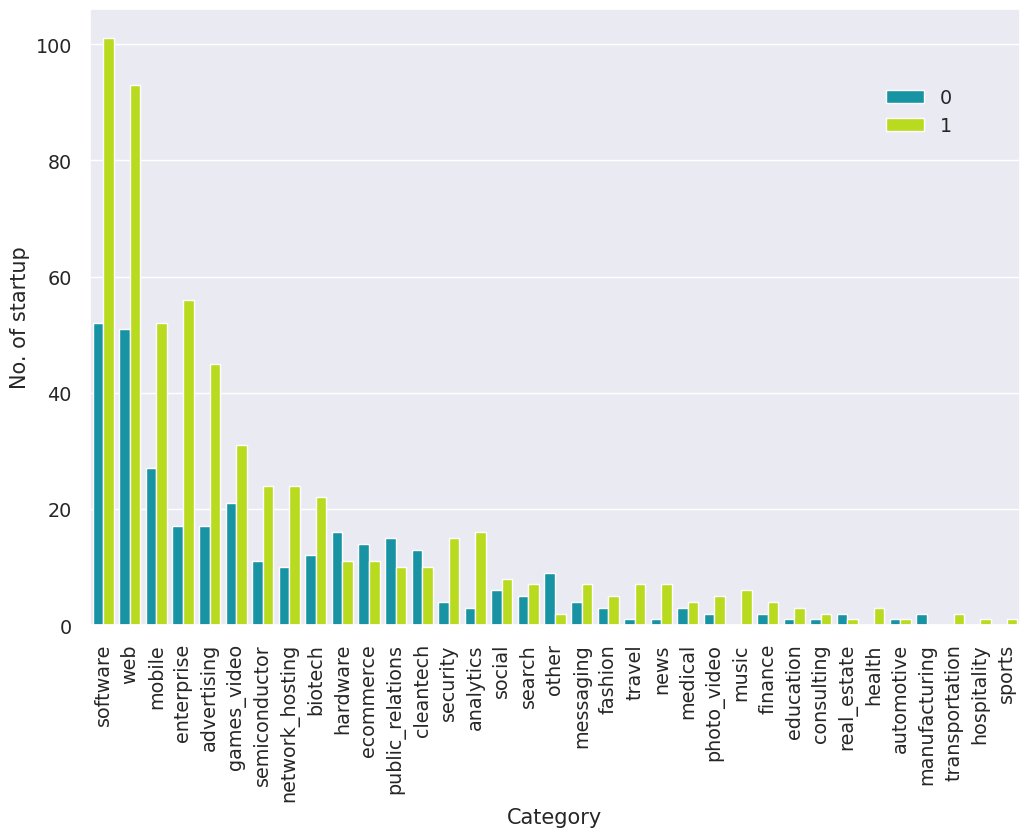

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df, palette="nipy_spectral",
              order=df.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Which category has the largest number Success Rate

In [49]:
data1 = df[df['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = df[df['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=df.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


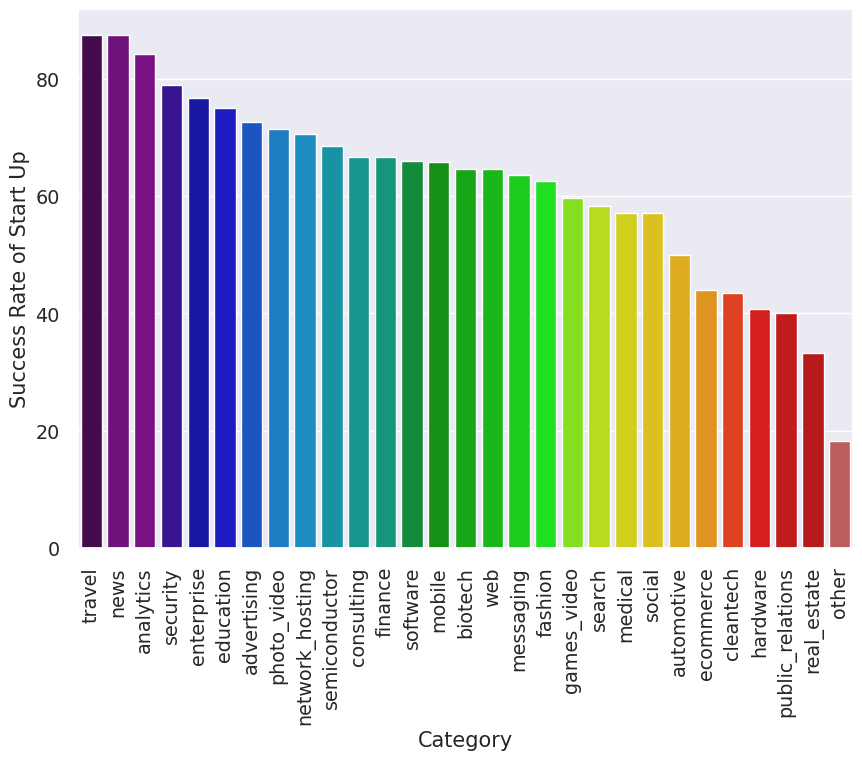

In [50]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

### Which category having most number of total funding

In [51]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


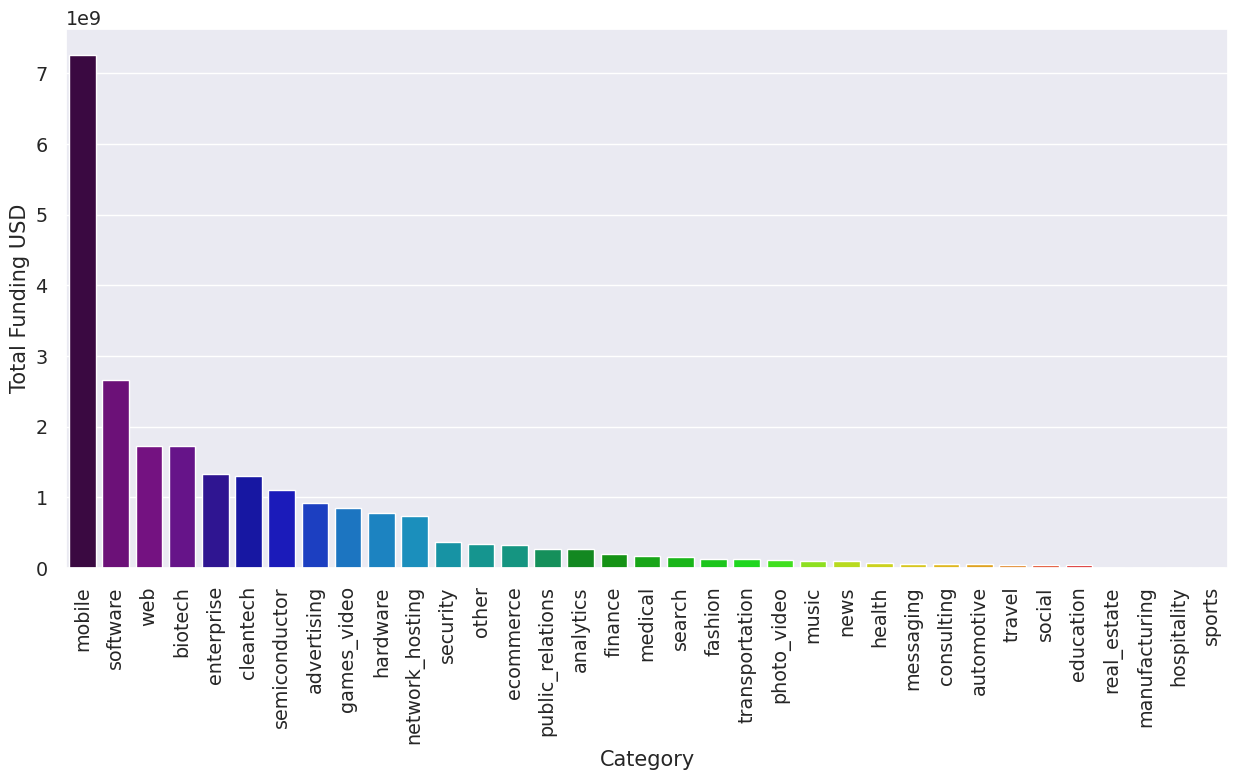

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

### Which State having most number of Startup

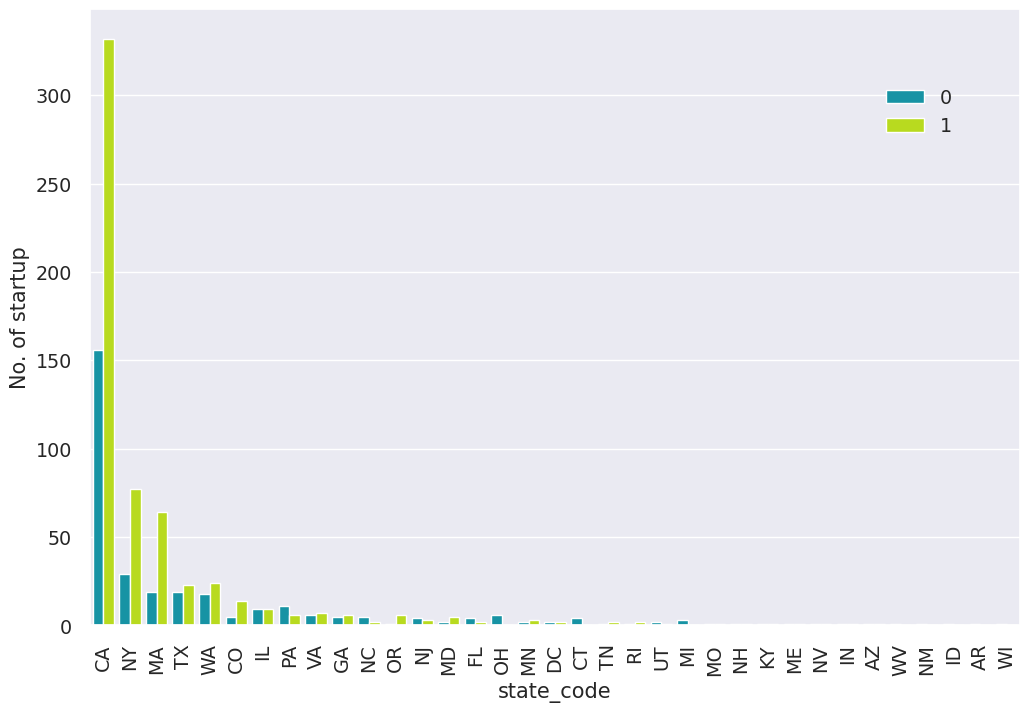

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [54]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


### Which State having most number of acquired Startup per category

In [55]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)

,state_code,category_code,num_startup
31,CA,web,55
72,MA,software,16
111,NY,web,15
144,WA,mobile,5
128,TX,enterprise,4
136,TX,web,4
51,IL,software,4
37,CO,software,4
44,GA,enterprise,2
138,VA,mobile,2


### Which State having most number of closed Startup per category

In [56]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,25
63,MA,software,8
95,NY,web,6
139,WA,web,5
123,TX,software,5
53,IL,web,3
130,VA,web,2
127,VA,mobile,2
77,NC,software,2
81,NJ,software,2


### Which city having most number of acquired Startup per category

In [57]:
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya

,city,category_code,num_startup
275,San Francisco,web,26
195,New York,web,15
331,Sunnyvale,software,9
169,Mountain View,web,9
289,San Mateo,software,9
209,Palo Alto,software,7
300,Santa Clara,semiconductor,5
343,Waltham,software,4
23,Austin,web,4
58,Burlington,software,4


### Which city having most number of closed Startup per category

In [58]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc

,index,city,category_code,num_startup
136,191,San Francisco,mobile,5
137,197,San Francisco,web,5
139,200,San Jose,hardware,5
143,215,Santa Clara,software,5
102,135,New York,games_video,5
140,208,San Mateo,web,4
107,150,Palo Alto,web,4
145,223,Seattle,web,3
86,103,Menlo Park,biotech,2
78,92,Los Angeles,games_video,2


### Which city having most number of total funding

In [59]:
funding_sorted_city = pd.pivot_table(df,
              index=['city'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_city.columns = ['city', 'funding_total_usd']
funding_sorted_city = funding_sorted_city.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_city = funding_sorted_city.head(10)
funding_sorted_city

,city,funding_total_usd
91,Kirkland,5718914576
174,San Francisco,1673487129
135,New York,1231405734
125,Mountain View,985553322
181,Santa Clara,839050274
176,San Jose,733181780
13,Austin,706317317
173,San Diego,614475001
163,Redwood City,521330100
110,Loveland,510000000


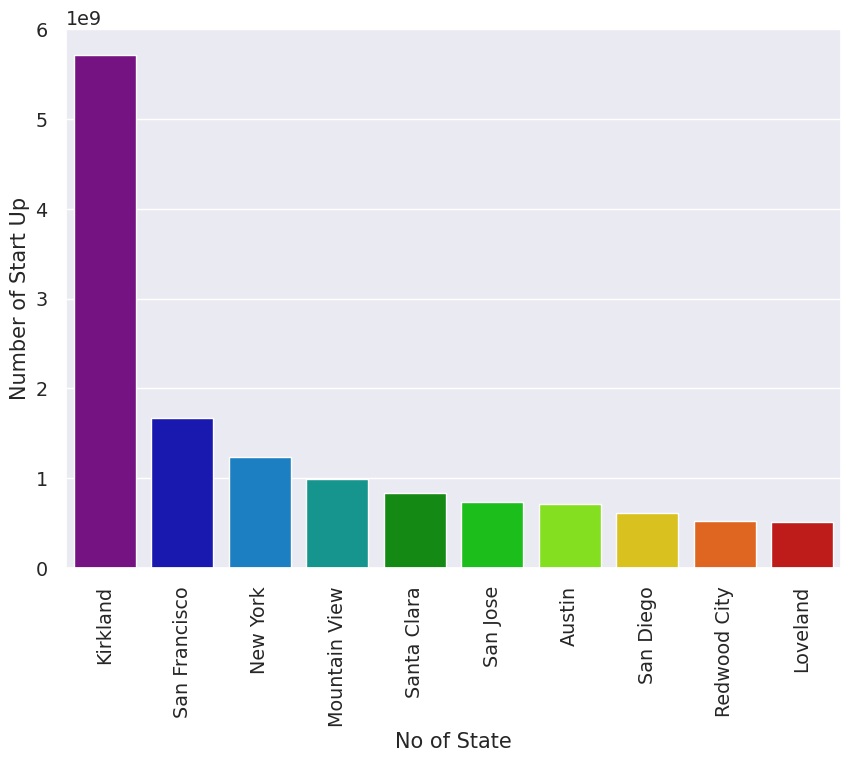

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="city", y="funding_total_usd", data=funding_sorted_city,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="No of State", ylabel="Number of Start Up")

In [61]:
df_what_in_kirkland = df[(df["city"] == 'Kirkland')]
df_what_in_kirkland.shape

(2, 47)

In [62]:
df_what_in_kirkland.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
62,332,WA,47.675489,-122.191667,98033-6314,c:19861,Kirkland,Kirkland WA 98033-6314,SchemaLogic,1/1/2001,31/12/2013,1/17/2005,4/20/2010,4.0466,9.3041,6.0027,6.0027,2,5,18914576,1,0,0,0,0,1,enterprise,0,0,0,1,0,0,0,0,0,0,c:19861,1,0,0,0,1,0,3.00,1,1
364,86,WA,30.632480,-86.984345,98033,c:13219,Kirkland,Kirkland WA 98033,Clearwire,10/1/2003,31/12/2013,5/6/2008,2/27/2013,4.6000,9.4164,5.2575,9.7753,19,4,5700000000,2,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:13219,0,0,0,0,0,0,4.25,1,1


### How many Startup have has_VC?

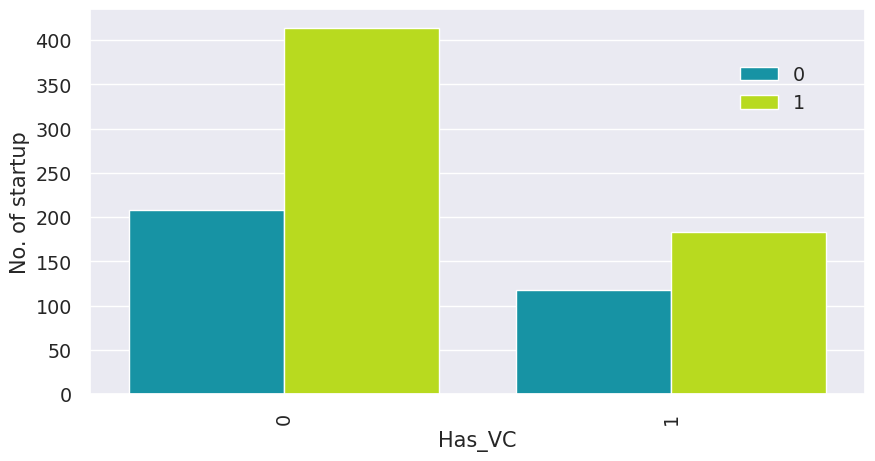

In [63]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="has_VC", hue="status", data=df, palette="nipy_spectral",
              order=df.has_VC.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Has_VC", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### How many Startup have is_top500?

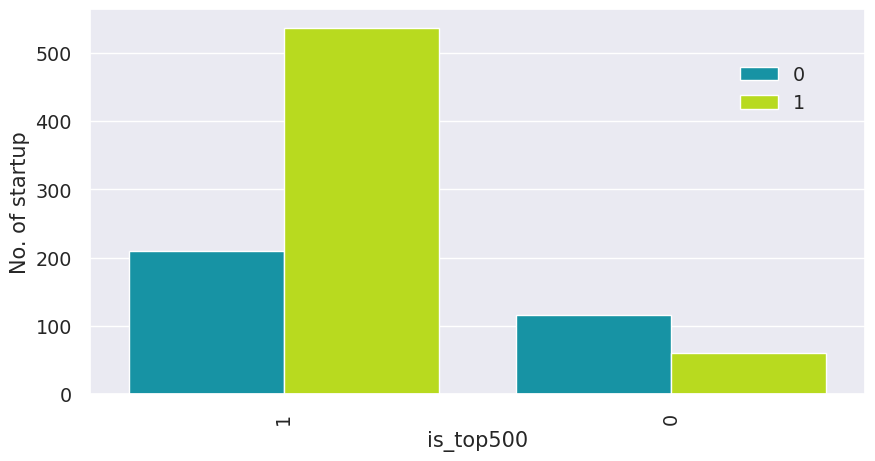

In [64]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df, palette="nipy_spectral",
              order=df.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [65]:
#How many Startup have both 'acquired' status and is_top500?
len(df[(df["status"] == True) & (df["is_top500"] == True)].index)

537

In [66]:
#How many Startup have both 'closed' status and is_top500?
len(df[(df["status"] == False) & (df["is_top500"] == False)].index)

116

In [67]:
df_acquired["is_top500"].value_counts(normalize=True)

1    0.899497
0    0.100503
Name: is_top500, dtype: float64

### How many years on average the company closes

In [68]:
df_closed.founded_at=pd.to_datetime(df_closed.founded_at)
df_closed.closed_at=pd.to_datetime(df_closed.closed_at)

In [69]:
df_closed['age_closed_startup'] = df_closed.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)

In [70]:
df_closed['age_closed_startup'].head()

4     792 days
5    2602 days
11   2161 days
12   3039 days
15   4104 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [71]:
df_closed['year'] = df_closed['age_closed_startup'].dt.days /365

In [72]:
df_closed.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age_closed_startup,year
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.00,1,0,792 days,2.169863
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.00,1,0,2602 days,7.128767
11,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Menlo Park CA 94025,Center'd,2006-01-01,2011-12-02,2/1/2007,5/3/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:4829,1,1,1,0,0,0,1.75,1,0,2161 days,5.920548


In [73]:
(df_closed['age_closed_startup'].mean())

Timedelta('2184 days 17:13:37.177914112')

In [74]:
ratarata = round(2184 / 365)
print("Rata-Rata Startup Closed :", ratarata ,"tahun")

Rata-Rata Startup Closed : 6 tahun


### which relationship related to acquired or closed startup?

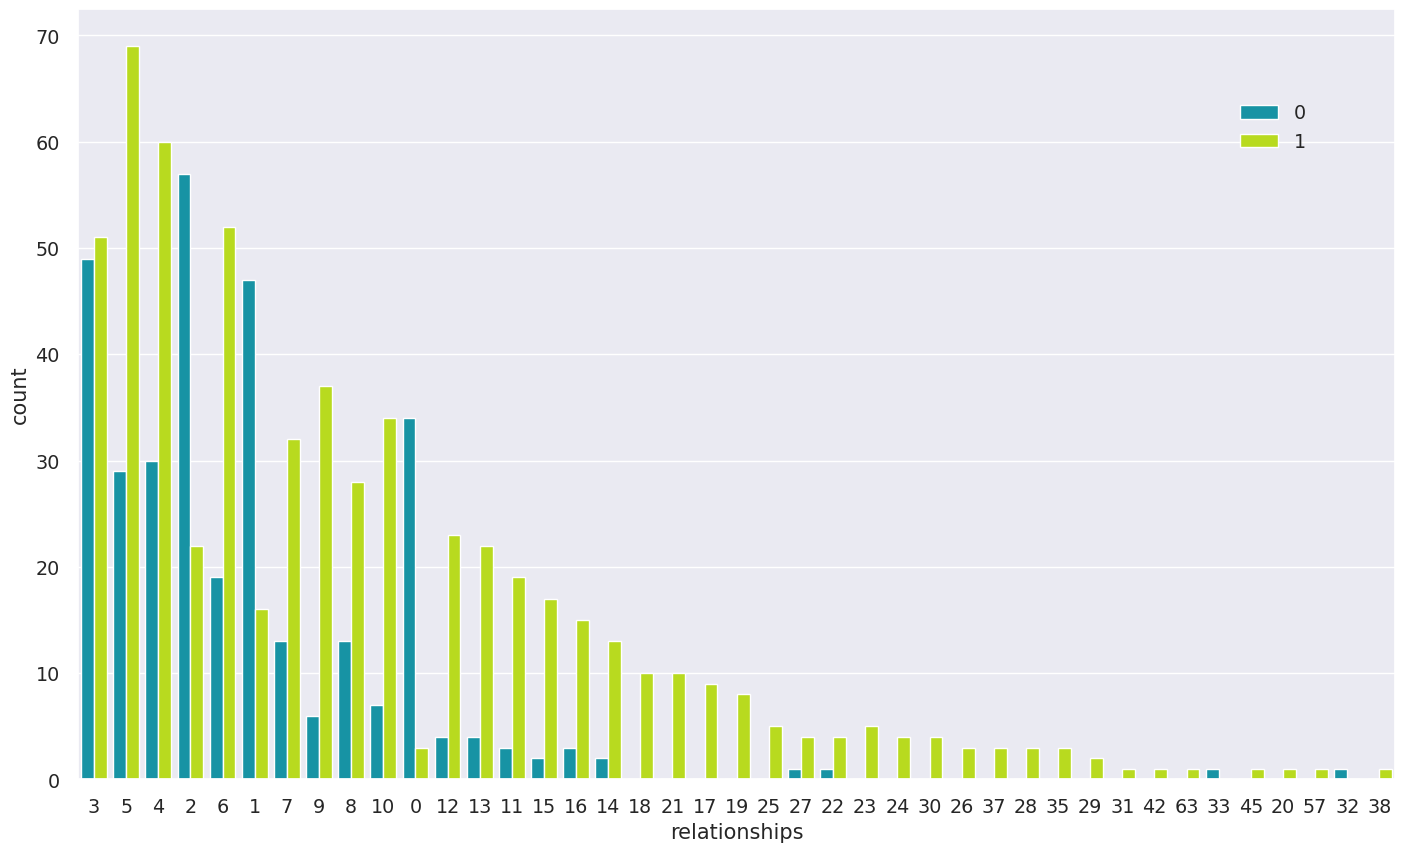

In [75]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))

### which funding_rounds related to acquired or closed startup?

<Axes: xlabel='funding_rounds', ylabel='count'>

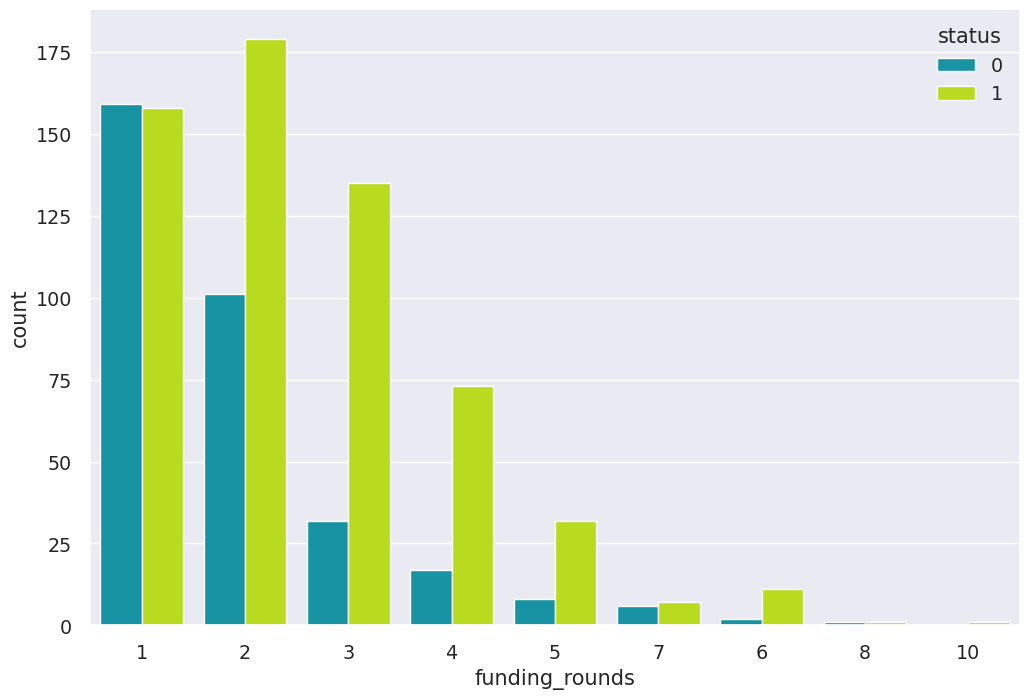

In [76]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral",
              order=df.funding_rounds.value_counts().index)
# plt.legend(bbox_to_anchor=(0.945, 0.90))

### Investing Feature on Acquired

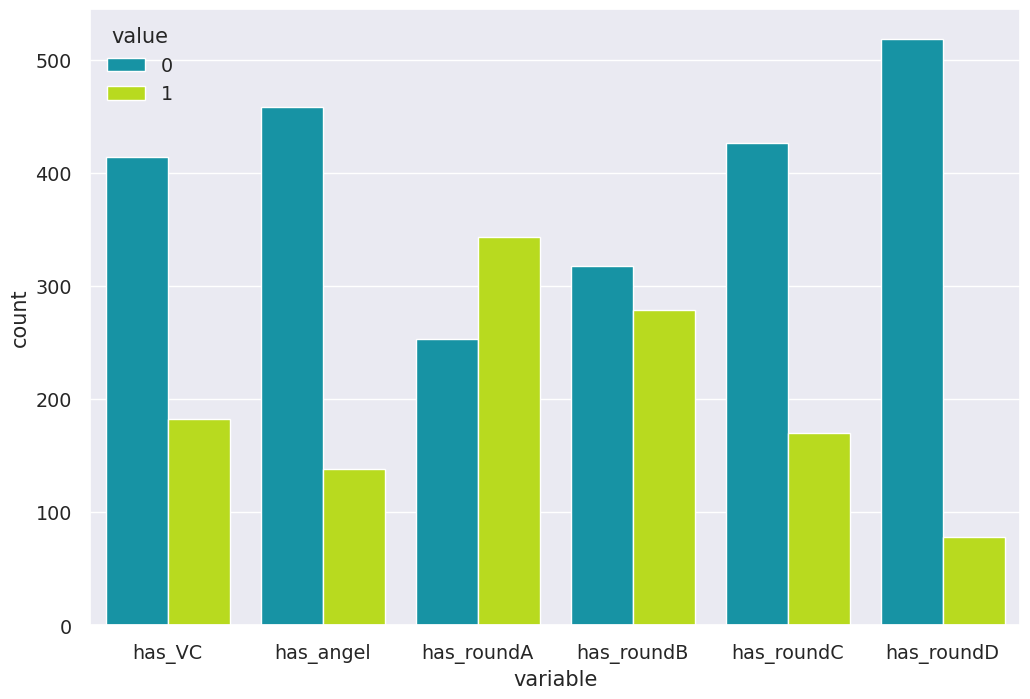

In [77]:
coba = df[(df["status"] == 1)]

features = coba[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]

fig, ax = plt.subplots(figsize=(12,8))

a= np.random.choice(["{}".format(i) for i in [1,2,3,4,5,6]], size=(12,8))
coba = pd.DataFrame(a, columns=["has_{}".format(i) for i in list("features")])

sns.countplot(x="variable", hue="value",palette="nipy_spectral", data=pd.melt(features))

plt.show()

### Mapping area startup

In [78]:
!pip install pyshp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.1 MB/s eta 0:00:00


In [79]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapefile as shp

In [80]:
import sys

In [81]:
'geopandas' in sys.modules

True

In [82]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [83]:
print(gdf.head())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name founded_at  \
0      San Diego      San Diego CA 92101        Bandsintown   1/1/2007   
1      Los Gatos      Los Gatos CA 95032          TriCipher   1/1/2000   
2      San Diego      San Diego CA 92121              Plixi  3/18/2009   
3      Cupertino      Cupertino CA 95014  Solidcore Systems   1/1/2002   
4  San Francisco  San Francisco CA 94105     Inhale Digital   8/1/2010   

    closed_at first_funding_at last_funding_at  age_first_funding_year  \
0  31/12/2013         4/1/2009        1/1/2010                  2.

In [84]:
import os

path = os.path.abspath('/path/to/json-map-file/USA_States.shp')

# Data Preprocessing

### Duplicate Values

In [85]:
#check
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


### Negative value

In [86]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [87]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [88]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


### Outliers

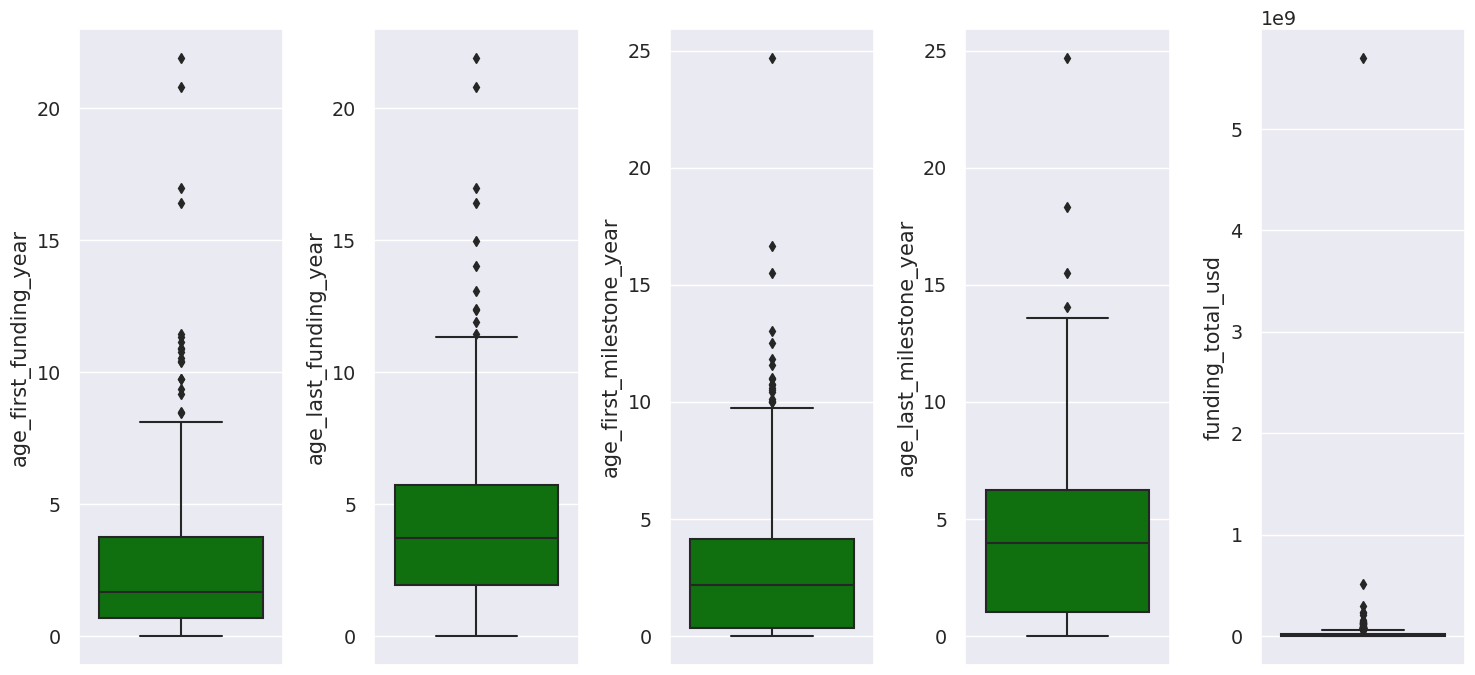

In [89]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

### Log-transformation of the funding and milestone year variable

In [90]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

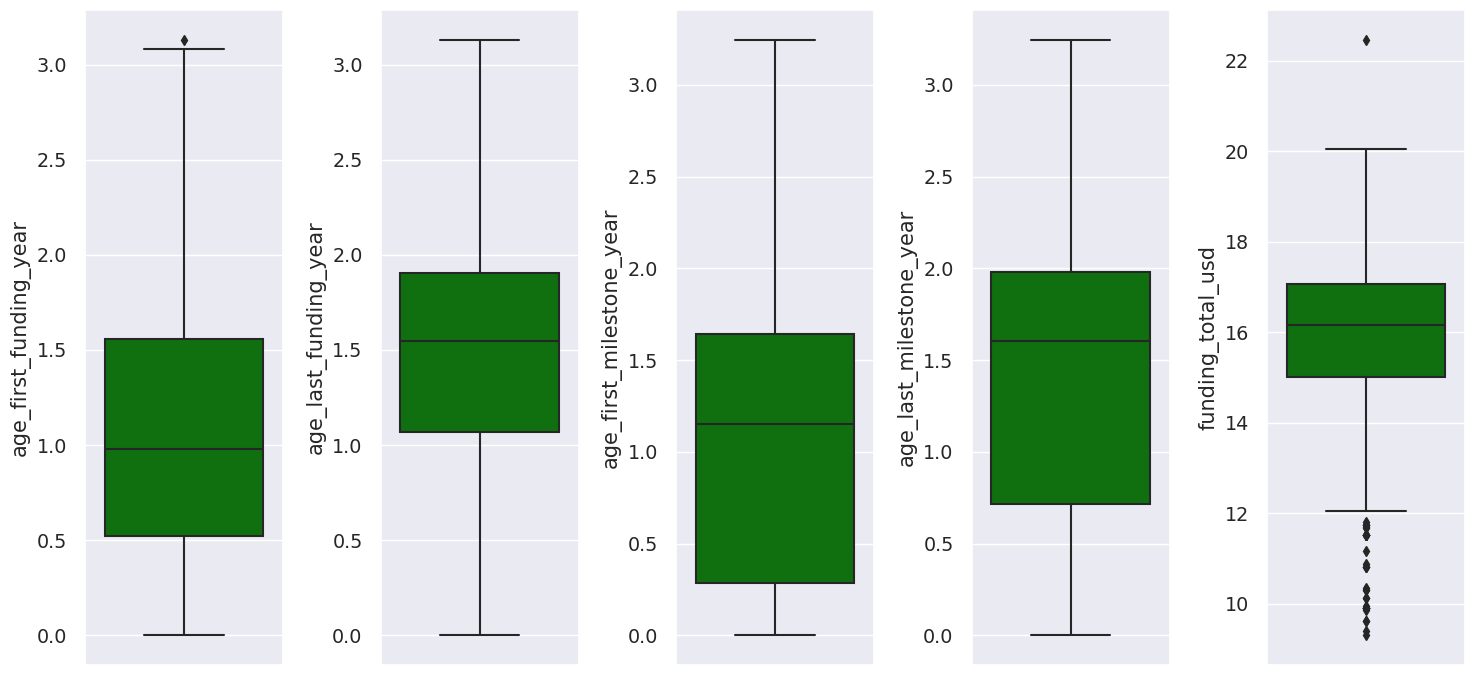

In [91]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()

# Feature Engineering

### New Column "has_RoundABCD"

In [92]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0


### New Column "has_Investor"

In [93]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1


In [94]:
len(df[(df["has_RoundABCD"] == 1)].index)

636

In [95]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

459

In [96]:
len(df)

840

In [97]:
923-490

433

### New Column "has_Seed"

In [98]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1


In [99]:
df['has_Seed'] == 1

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
12      True
13     False
14     False
15      True
16     False
18     False
19     False
20     False
21     False
22     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
31     False
33      True
34      True
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43     False
44     False
45     False
46     False
47     False
48      True
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
61     False
62     False
63      True
64     False
65     False
66      True
67      True
68     False
69     False
70     False
72      True
73     False
74     False
75     False
76      True
77     False
78     False
81     False
82      True
83     False
84     False

### New Column "invalid_startup"

In [100]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0


In [101]:
len(df[(df["invalid_startup"] == 1)].index)

25

### New Column "age_startup_year"

In [102]:
df.founded_at=pd.to_datetime(df.founded_at)
df.closed_at=pd.to_datetime(df.closed_at)

In [103]:
df['age_closed_startup'] = df.apply(lambda row: (row.closed_at - row.founded_at) , axis=1)
df['age_closed_startup'].head()

0   2556 days
1   5113 days
2   1749 days
3   4382 days
4    792 days
Name: age_closed_startup, dtype: timedelta64[ns]

In [104]:
df['age_startup_year'] = df['age_closed_startup'].dt.days /365

### New column "tier_relationships"

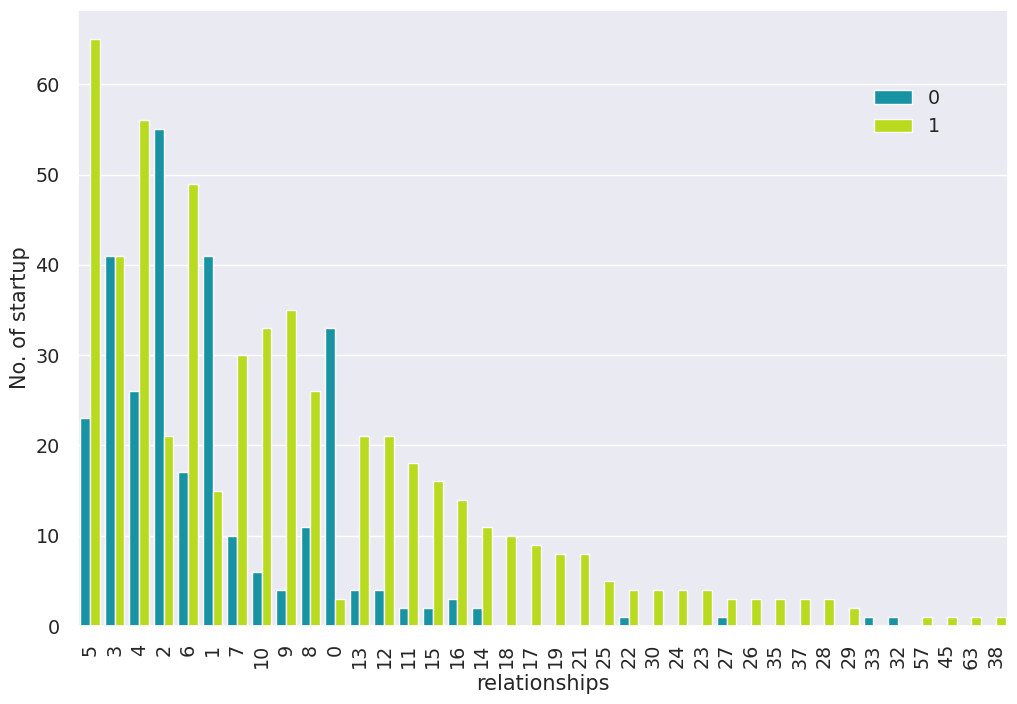

In [105]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [106]:
# create a list of our conditions
conditions = [
    (df['relationships'] <= 5),
    (df['relationships'] > 5) & (df['relationships'] <= 10),
    (df['relationships'] > 10) & (df['relationships'] <= 16),
    (df['relationships'] > 16)
    ]

# create a list of the values we want to assign for each condition
values = ['4', '3', '2', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier_relationships'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed,invalid_startup,age_closed_startup,age_startup_year,tier_relationships
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2013-12-31,4/1/2009,1/1/2010,1.178440,1.386969,1.734925,2.041753,3,3,12.834684,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1,0,1,1,0,2556 days,7.002740,4
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2013-12-31,2/14/2005,12/28/2009,1.812542,2.397650,2.080129,2.080129,9,4,17.506887,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1,1,1,0,0,5113 days,14.008219,3
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2013-12-31,3/30/2010,3/30/2010,0.709463,0.709463,0.899145,1.164868,5,1,14.771022,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1,1,0,0,0,1749 days,4.791781,4
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2013-12-31,2/17/2005,4/25/2007,1.418641,1.842944,1.946296,1.946296,5,3,17.504390,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1,1,0,0,0,4382 days,12.005479,4
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.000000,0.981517,0.037681,0.037681,2,2,14.077876,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0,0,1,1,0,792 days,2.169863,4


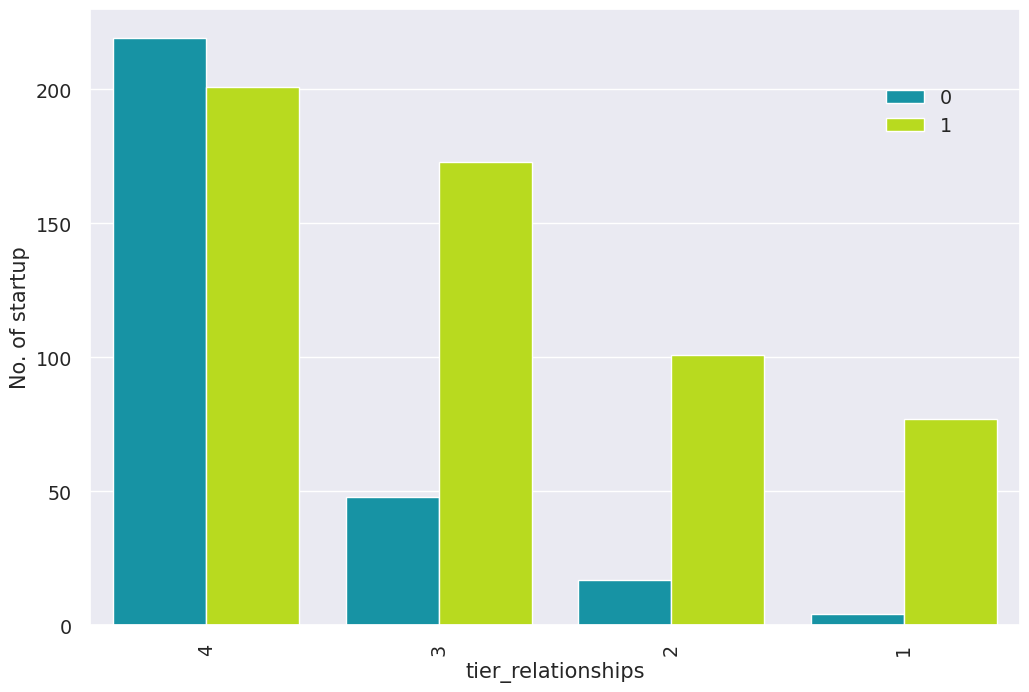

In [107]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="tier_relationships", hue="status", data=df, palette="nipy_spectral",
              order=df.tier_relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="tier_relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

In [108]:
df['tier_relationships'] = df.tier_relationships.astype(int)

### Drop unused column for modelling

In [110]:
df = df.drop(columns=['state_code', 'id', 'Unnamed: 6', 'category_code', 'object_id', 'zip_code', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'city', 'name', 'Unnamed: 0', 'latitude', 'longitude', 'age_closed_startup', 'relationships'])


#Modelling

In [116]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


In [117]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (672, 36)
Shape of the y Train : (672,)
Shape of the X test : (168, 36)
Shape of the y test : (168,)


## LGBM Classifier

In [120]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

### Feature importance by LGBM

In [121]:
import lightgbm as lgb
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(X_train,y_train)
gbm.booster_.feature_importance()


# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
34,age_startup_year,553
0,age_first_funding_year,315
1,age_last_funding_year,292
5,funding_total_usd,291
3,age_last_milestone_year,239
2,age_first_milestone_year,215
28,avg_participants,134
6,milestones,64
35,tier_relationships,56
21,is_othercategory,34


### Recursive Feature Elimination(RFE)

In [124]:
from sklearn.feature_selection import RFE

# create the Recursive Feature Elimination model and select 10 attributes
rfe = RFE(estimator=gbm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)

# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols': X.columns, 'fea_rank': rfe.ranking_})
fea_rank_ = fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by='fea_rank', ascending=True)

# print the top 10 features
print(fea_rank_.head(10))


[ True  True  True  True False  True  True False False False False False
 False False False False False False False False False False  True False
 False False False False  True False False False False False  True  True]
                        cols  fea_rank
0     age_first_funding_year         1
28          avg_participants         1
22                    has_VC         1
34          age_startup_year         1
6                 milestones         1
35        tier_relationships         1
2   age_first_milestone_year         1
5          funding_total_usd         1
1      age_last_funding_year         1
3    age_last_milestone_year         1


### Build Model

Training Accuracy : 1.0
Testing Accuracy : 0.9047619047619048


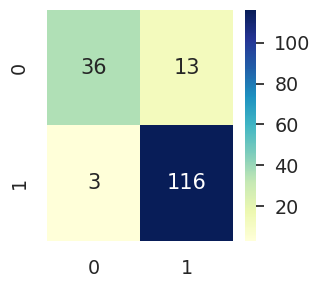

              precision    recall  f1-score   support

           0       0.92      0.73      0.82        49
           1       0.90      0.97      0.94       119

    accuracy                           0.90       168
   macro avg       0.91      0.85      0.88       168
weighted avg       0.91      0.90      0.90       168

------------------------------------------
ROC Curves              = 0.8547418967587034
Precision-Recall Curves = 0.9459359325125398


In [123]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()

clf.fit(X_train,y_train)

y_pred_lgb = clf.predict(X_test)

print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_lgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_lgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
Precision_Recall_lgbm = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_lgbm)


## XGBoost Classifier

In [129]:
from xgboost import XGBClassifier

Training Accuracy : 1.0
Testing Accuracy : 0.8809523809523809


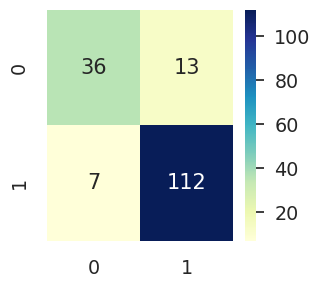

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        49
           1       0.90      0.94      0.92       119

    accuracy                           0.88       168
   macro avg       0.87      0.84      0.85       168
weighted avg       0.88      0.88      0.88       168

------------------------------------------
ROC Curves              = 0.8379351740696277
Precision-Recall Curves = 0.939421568627451


In [130]:
import xgboost as xgb
#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

## GradientBoosting Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.875


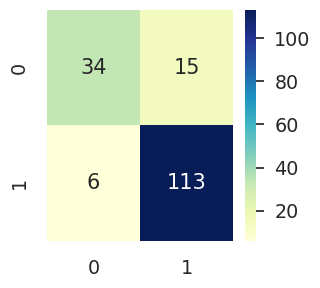

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        49
           1       0.88      0.95      0.91       119

    accuracy                           0.88       168
   macro avg       0.87      0.82      0.84       168
weighted avg       0.87      0.88      0.87       168

------------------------------------------
ROC Curves              = 0.8217286914765906
Precision-Recall Curves = 0.9340533088235293


In [131]:
from sklearn.ensemble import GradientBoostingClassifier
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)

## AdaBoost Classifier

Training Accuracy : 0.8824404761904762
Testing Accuracy : 0.8690476190476191


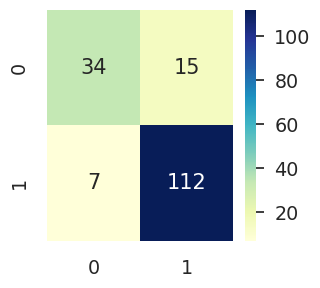

              precision    recall  f1-score   support

           0       0.83      0.69      0.76        49
           1       0.88      0.94      0.91       119

    accuracy                           0.87       168
   macro avg       0.86      0.82      0.83       168
weighted avg       0.87      0.87      0.87       168

roc_auc 0.8175270108043217
------------------------------------------
ROC Curves              = 0.8175270108043217
Precision-Recall Curves = 0.9323664505172148


In [132]:
from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.8333333333333334


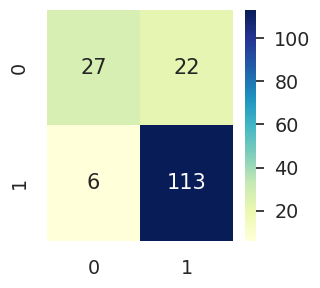

              precision    recall  f1-score   support

           0       0.82      0.55      0.66        49
           1       0.84      0.95      0.89       119

    accuracy                           0.83       168
   macro avg       0.83      0.75      0.77       168
weighted avg       0.83      0.83      0.82       168

------------------------------------------
ROC Curves              = 0.750300120048019
Precision-Recall Curves = 0.911165577342048


In [133]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)
print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

## Summary

In [134]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scores = {'LGBM':  {
                             'precision_score': precision_score(y_test, y_pred_lgb),
                             'recall_score': recall_score(y_test, y_pred_lgb)
                         },
                 'GradientBoosting Classifier':  {
                             'precision_score': precision_score(y_test, y_predicted_gb),
                             'recall_score': recall_score(y_test, y_predicted_gb)
                         },
                 'Adaboost Classifier':  {
                             'precision_score': precision_score(y_test, y_predicted_ab),
                             'recall_score': recall_score(y_test, y_predicted_ab)
                         },
                 'XGBoost':  {
                             'precision_score': precision_score(y_test, y_predicted_xgb),
                             'recall_score': recall_score(y_test, y_predicted_xgb)
                         },
                 'Random Forest':  {
                             'precision_score': precision_score(y_test, y_pred_rf),
                            'recall_score': recall_score(y_test, y_pred_rf)
                         }
            }
from sklearn.metrics import precision_score


Precision_Recall = {'LGBM':  {
                             'Precision_Recall': Precision_Recall_lgbm
                         },
                 'GradientBoosting Classifier':  {
                             'Precision_Recall': Precision_Recall_gbs
                         },
                 'Adaboost Classifier':  {
                             'Precision_Recall': Precision_Recall_abs
                         },
                 'XGBoost':  {
                             'Precision_Recall': Precision_Recall_xgb
                         },
                 'Random Forest':  {
                             'Precision_Recall': Precision_Recall_rfs
                         }
            }


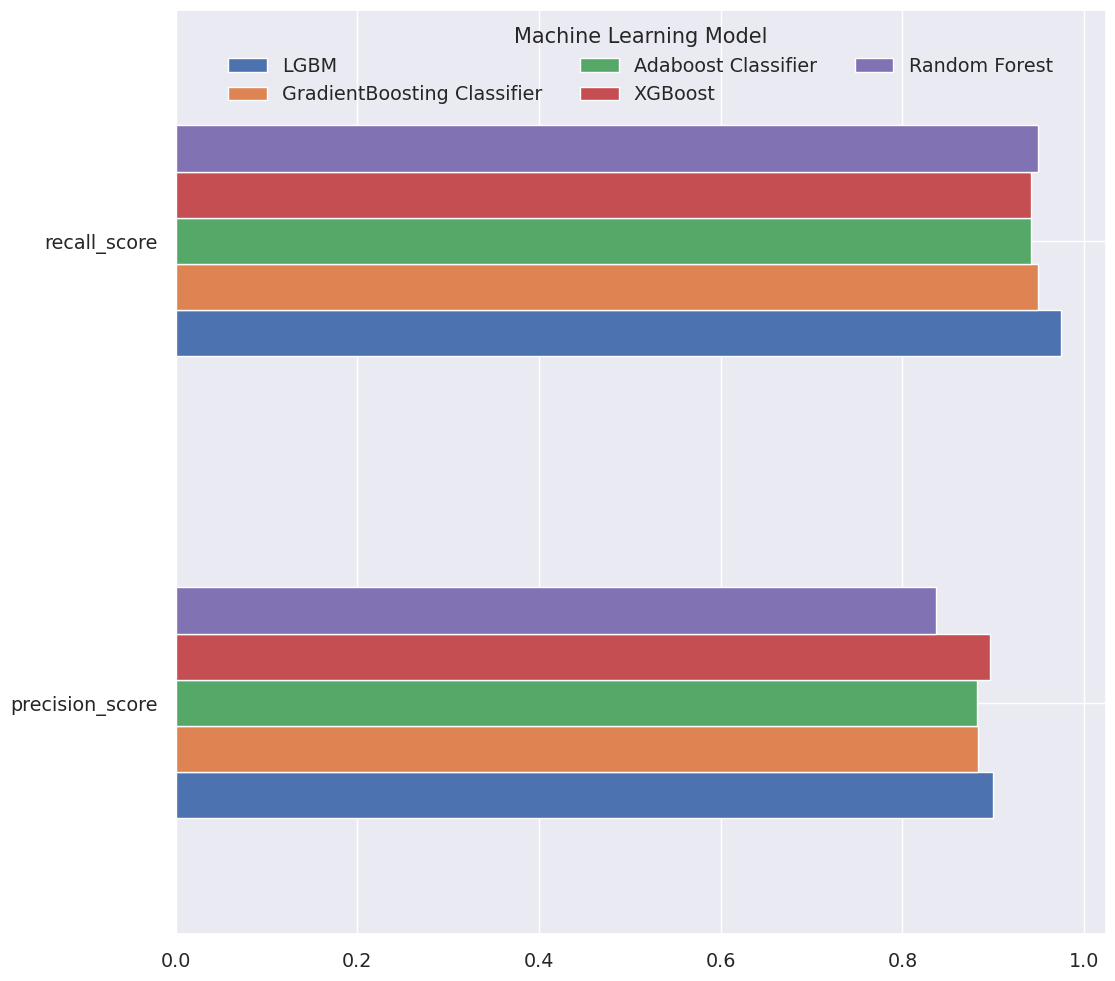

In [135]:
scores = pd.DataFrame(scores)


scores.plot(kind="barh",figsize=(12, 12)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

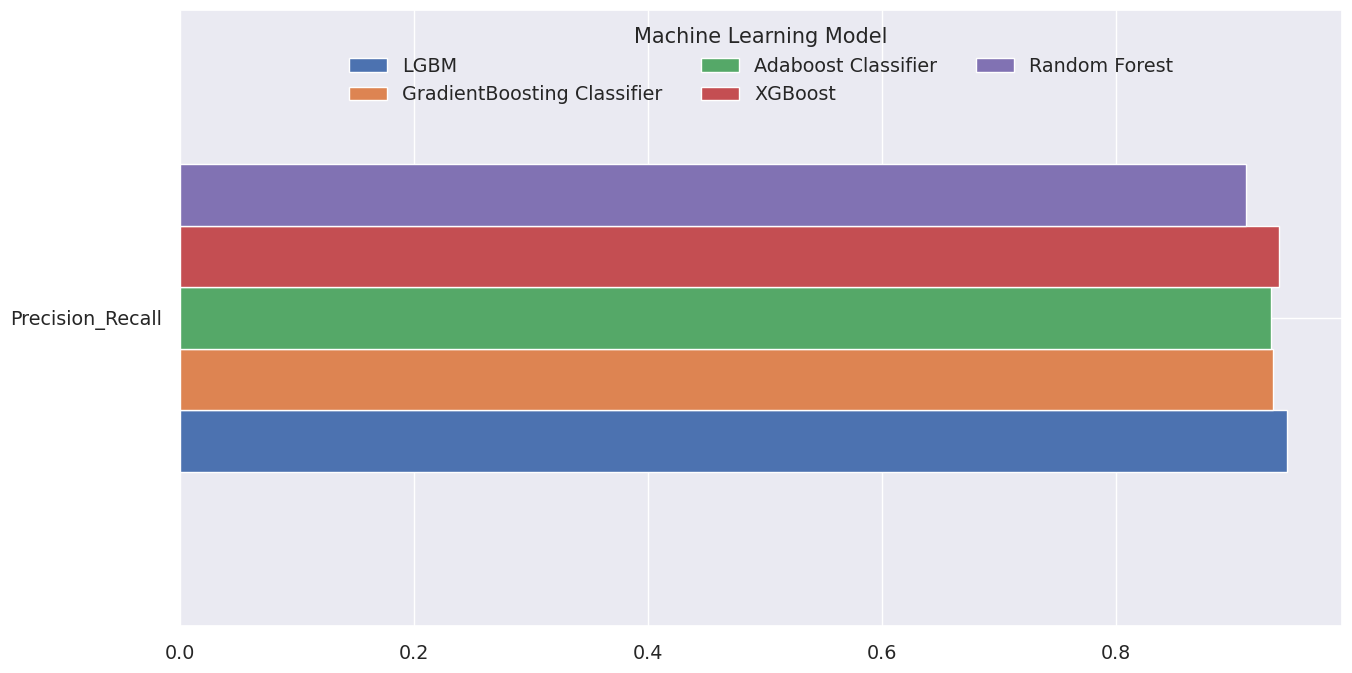

In [136]:
Precision_Recall = pd.DataFrame(Precision_Recall)


Precision_Recall.plot(kind="barh",figsize=(15, 8)).legend(loc='upper center', ncol=3, title="Machine Learning Model")

## Deploy Model

In [137]:
# import pickle

In [138]:
# # Saving model to disk
# pickle.dump(gbm, open('model.pkl','wb'))

In [139]:
# # Loading model to compare the results
# model = pickle.load(open('model.pkl','rb'))
# print(model.predict([[2, 3, 4, 6, 3, 3, 375000, 3, 1, 6,]]))

In [140]:
# df2 = df[["status","age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year","relationships","funding_rounds","funding_total_usd","milestones","avg_participants"]]
# df2.head(10)